#1. (Valor: 1.5 pontos) Considere as sequências
 - x(n) = {−1, 1, 2} e h(n) = {3, 1, −2, 3, −2}

- Escreva um programa para calcular e desenhar a sequência y(n) = x(n) ∗ h(n)

### Definição das bibliotecas e funções que serão utilizadas para a resolução da atividade

In [85]:
from re import X
import numpy as np
from itertools import zip_longest
import matplotlib.pyplot as plt

def zero(v, n):
  for i in range(n):
    v.append(0)

def apresentar_lista(n):
  print(n)

def inverter_lista(n):
  n.reverse()

def somar_listas(a, b, c,d,e):
  soma = [sum(valores) for valores in zip_longest(a, b, c,d,e, fillvalue=0)]
  print(f'Esse é o resultado da soma após a multiplicação de x_n com h_n, logo y_n = {soma} com tamanho m + n = {len(soma)}')
  return soma

def plotar_grafico(n,nome, condicao, valor_central=0):
  #indice = list(range(len(n)))

  if condicao:
    inverter_lista(n)

  indice = list(range(-valor_central, -valor_central + len(n)))

  plt.stem(indice, n, basefmt = 'b-', use_line_collection=False)
  plt.title(f'Gráfico de {nome} no tempo discreto')
  plt.xlabel('Indices')
  plt.ylabel('Amplitude')

  plt.axhline(0, color='b', linestyle='-', label='Nova Origem')
  plt.yticks(range(int(min(n)), int(max(n)) + 1))


  plt.axvline(0, color='r', linestyle='dotted', label='Valor Central')

  plt.legend()
  plt.grid()
  plt.show()


### Definição das listas de sequência de:
- x(n) = {-1, 1, 2} com o valor central igual a 1
- h(n) = {3, 1, −2, 3, −2} com o valor central igual a 1


In [102]:
x_n = np.array([-1, 1, 2])
## esse é o valor de n=0 da lista de entrada do sistema
valor_central_x = x_n[1]
print(f'Essa é a lista de entradas {x_n}, com valor de n=0 sendo {valor_central_x}')

## vaiores em lista da função de transfência do sistema
h_n= np.array([3, 1,-2,3,-2])
## Esse é o valor refência de n=0 para a lista da função de trasferência
valor_central_h = h_n[1]
print(f'Essa é a lista da função de transferência {h_n}, com valor de n=0 sendo {valor_central_h}')


Essa é a lista de entradas [-1  1  2], com valor de n=0 sendo 1
Essa é a lista da função de transferência [ 3  1 -2  3 -2], com valor de n=0 sendo 1


### Resultado da convolução utilizando a função de convolução do numpy
- y(n) = x(n) ~x~ h(n)

In [87]:
resul_np = np.convolve(x_n, h_n, mode ='full')
print(f'Esse é o resultado utilizando a função de convolução do Numpy: {resul_np}')

Esse é o resultado utilizando a função de convolução do Numpy: [-3  2  9 -3  1  4 -4]


### Identificando o tamanho de cada lista para ter cono base quantos elementos terá a lista y(n), sabendo que o seu tamanhao será: m + n - 1

In [88]:
#Tamanho de cada lista
m = len(x_n)
print(f'Tamanho da lista de entrada m = {m}')
n = len(h_n)
print(f'Tamanho da lista de entrada m = {n}')
print(f'O Tamanho da lista da saída do sistema após a convolução de x(n) = {x_n} com h(n) = {h_n} será {m+n-1}')


Tamanho da lista de entrada m = 3
Tamanho da lista de entrada m = 5
O Tamanho da lista da saída do sistema após a convolução de x(n) = [-1  1  2] com h(n) = [ 3  1 -2  3 -2] será 7


### Agora, irei fazer o metodo de baixo nivel para obter o mesmo resultado obtido anteriormente, porém utilizando funções nativas do python e blocos de repetição.
- ### IMPLEMENTAÇÂO DO METODO DE PIERRE



In [89]:
#METODO DE PIERRE
print(h_n)
a = []
ar = np.flip(h_n)
print(ar)
for i in ar:
  print(i)
  for j in x_n:
    num = i*j
    print(num)
    a.append(num)
    print(a)


[ 3  1 -2  3 -2]
[-2  3 -2  1  3]
-2
2
[2]
-2
[2, -2]
-4
[2, -2, -4]
3
-3
[2, -2, -4, -3]
3
[2, -2, -4, -3, 3]
6
[2, -2, -4, -3, 3, 6]
-2
2
[2, -2, -4, -3, 3, 6, 2]
-2
[2, -2, -4, -3, 3, 6, 2, -2]
-4
[2, -2, -4, -3, 3, 6, 2, -2, -4]
1
-1
[2, -2, -4, -3, 3, 6, 2, -2, -4, -1]
1
[2, -2, -4, -3, 3, 6, 2, -2, -4, -1, 1]
2
[2, -2, -4, -3, 3, 6, 2, -2, -4, -1, 1, 2]
3
-3
[2, -2, -4, -3, 3, 6, 2, -2, -4, -1, 1, 2, -3]
3
[2, -2, -4, -3, 3, 6, 2, -2, -4, -1, 1, 2, -3, 3]
6
[2, -2, -4, -3, 3, 6, 2, -2, -4, -1, 1, 2, -3, 3, 6]


### Após o cálculo pelo metodo de Pierre, todos os valores foram colocados em apenas uma lista. Logo, é necessário separá-los para efetuar a adição corretamente desses valores, semelhante a resolvê-lo analiticamente.

In [90]:
print(len(a))
b = a[:3]
apresentar_lista(b)

c = a[3:6]
apresentar_lista(c)
zero(c,1)

d = a[6:9]
apresentar_lista(d)
zero(d,2)

e = a[9:12]
apresentar_lista(e)
zero(e,3)

f= a[12:15]
apresentar_lista(f)
zero(f,4)

15
[2, -2, -4]
[-3, 3, 6]
[2, -2, -4]
[-1, 1, 2]
[-3, 3, 6]


### Apresentação de cada lista

In [91]:
apresentar_lista(b)
apresentar_lista(c)
apresentar_lista(d)
apresentar_lista(e)
apresentar_lista(f)

[2, -2, -4]
[-3, 3, 6, 0]
[2, -2, -4, 0, 0]
[-1, 1, 2, 0, 0, 0]
[-3, 3, 6, 0, 0, 0, 0]


### Invertendo a posição dos elementos da lista após adicão de valores nulos ao final de cada lista utilizando a função zero definida no inicio do programa, para efetuar a adição corretamente.

In [92]:
## agora vou ter que somar as três listas
inverter_lista(b)
inverter_lista(c)
inverter_lista(d)
inverter_lista(e)
inverter_lista(f)

apresentar_lista(b)
apresentar_lista(c)
apresentar_lista(d)
apresentar_lista(e)
apresentar_lista(f)

[-4, -2, 2]
[0, 6, 3, -3]
[0, 0, -4, -2, 2]
[0, 0, 0, 2, 1, -1]
[0, 0, 0, 0, 6, 3, -3]


### Após isso, irei somar as listas utlizando a função soma_lista definida no inicio do programa

In [93]:
### Encontrando o resultado da convolução pelo metodo de Pierre
resul = somar_listas(b,c,d, e, f)


Esse é o resultado da soma após a multiplicação de x_n com h_n, logo y_n = [-4, 4, 1, -3, 9, 2, -3] com tamanho m + n = 7


### Encontrando a quantidade de valores presentes depois do valor central em cada lista para definir o valor central de y(n)

In [94]:
### Encontrando a quantidade de valores presentes depois do valor central em cada lista
n_x= len(x_n[valor_central_x:])-len(x_n[:valor_central_x])
print(f'Essa é a quantidade de valores depois de n=0 da lista de entrada: {n_x}')
n_h= len(h_n[valor_central_h:])-len(h_n[:valor_central_h])
print(f'Essa é a quantidade de valores depois de n=0 da lista de entrada: {n_h}')
n_central_y = n_x+n_h


## Valor central de y_n
valor_central_y = resul[n_central_y]
print(f'Valor central de y_n é: {valor_central_y}')

Essa é a quantidade de valores depois de n=0 da lista de entrada: 1
Essa é a quantidade de valores depois de n=0 da lista de entrada: 3
Valor central de y_n é: 9


### Resultado da convolução "analiticamente"

In [100]:
## logo o resultado da convolução é:

print(f'y(n) é :{resul[::-1]} com valor central igual a {valor_central_y}')


y(n) é :[-3, 2, 9, -3, 1, 4, -4] com valor central igual a 9


### Plotando o gráfico utilizando ao função plotar_grafico definida no inicio do programa

<ipython-input-85-ab62587c3f9d>:29: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(indice, n, basefmt = 'b-', use_line_collection=False)


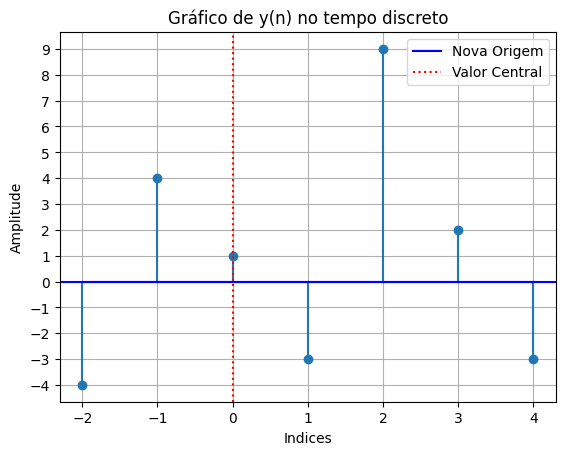

In [103]:
## Plotando o gráfico da entrada do sistema
##plotar_grafico(x_n, "x(n)", False, valor_central_x)
## Plotando o gráfico da função de trasnferência do sistema
##plotar_grafico(h_n, "h(n)", False, valor_central_h)
##Plotando o gráfico de y(n)
plotar_grafico(resul, "y(n)", True, len(resul)-n_central_y-1)

# 2ª Questão
Considere a função
  X(z) = z/z² - 3z +2

- (a) (Valor: 1.0 ponto) Desenhe a sua RoC

-  (b) (Valor: 0.5 ponto) Obtenha x(n)


### a) Região de Convergência

Região de Convergência: [2. 1.]


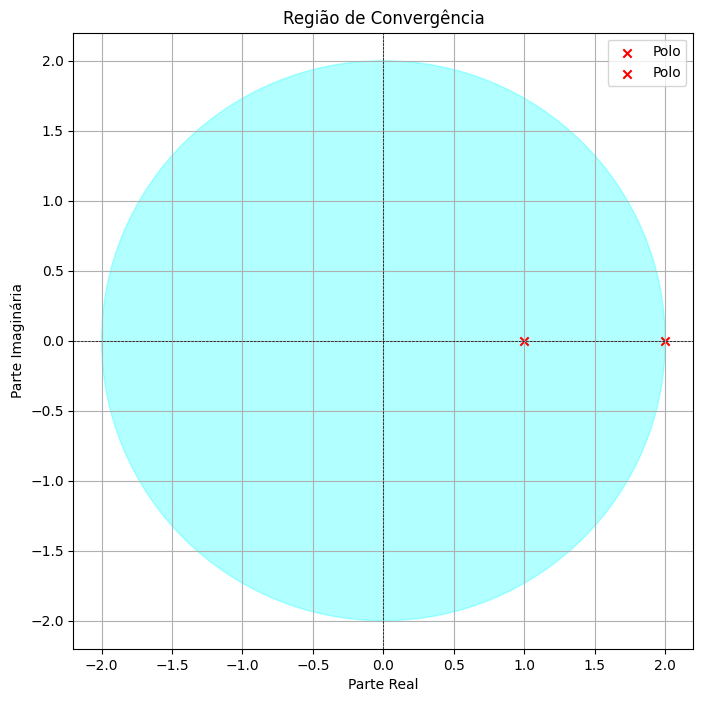

In [97]:
import numpy as np
import matplotlib.pyplot as plt

def inverse_z_transform(b, a, n_max=10):
    """
    Calcula a transformada inversa de Z para uma dada função de transferência.

    Parameters:
    - b: Coeficientes do numerador da função de transferência.
    - a: Coeficientes do denominador da função de transferência.
    - n_max: Número máximo de pontos para a sequência discreta.

    Returns:
    - x: Sequência discreta resultante.
    - ROC: Região de convergência.
    """
    # Calcula a região de convergência
    ROC = np.roots(a)

    # Gera valores de n para a sequência discreta
    n = np.arange(0, n_max)

    # Calcula a sequência discreta usando a soma infinita
    x = np.zeros_like(n, dtype=np.complex128)
    for i, b_i in enumerate(b):
        x += b_i * np.power(n, i) / np.math.factorial(i)

    return x, ROC

def plotar_regiao_convergencia(ROC):
    plt.figure(figsize=(8, 8))

    # Plota o círculo representando a região de convergência
    circle = plt.Circle((0, 0), max(np.abs(ROC)), color='cyan', fill=True, alpha=0.3)
    plt.gca().add_patch(circle)

    # Plota os polos com cores diferentes com base no sinal da parte real
    for pole in ROC:
        color = 'red' if np.real(pole) >= 0 else 'blue'
        plt.scatter(np.real(pole), np.imag(pole), marker='x', color=color, label='Polo')

    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginária')
    plt.title('Região de Convergência')
    plt.legend()
    plt.grid()
    plt.show()
# Coeficientes da função de transferência
b = [1, 0]
a = [1, -3, 2]

# (a) Obtendo e plotando a região de convergência
x, ROC = inverse_z_transform(b, a, n_max=1)
print("Região de Convergência:", ROC)
plotar_regiao_convergencia(ROC)




### b) Calculando o x(n) em lista de sequência

In [98]:
import numpy as np
from scipy.signal import residue, tf2zpk, zpk2tf

def inverse_z_transform(b, a, n_max=10):
    """
    Calcula a transformada inversa de Z para uma dada função de transferência.

    Parameters:
    - b: Coeficientes do numerador da função de transferência.
    - a: Coeficientes do denominador da função de transferência.
    - n_max: Número máximo de pontos para a sequência discreta.

    Returns:
    - x: Sequência discreta resultante.
    """
    # Converte os coeficientes para forma de zeros e polos
    zeros, poles, _ = tf2zpk(b, a)

    # Calcula as frações parciais
    _, residue_values, _ = residue(b, a)

    # Gera valores de n para a sequência discreta
    n = np.arange(0, n_max)

    # Calcula a sequência discreta usando as frações parciais
    x = np.zeros_like(n, dtype=np.complex128)
    for zero, residue_value in zip(zeros, residue_values):
        x += residue_value * np.power(zero, n)

    return x

# Coeficientes da função de transferência
b = [1, 0]
a = [1, -3, 2]

# Obtendo a sequência discreta
x = inverse_z_transform(b, a, n_max=10) + 1
print("Sequência discreta (x[n]):", x)


Sequência discreta (x[n]): [2.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j]


### Plotando o gráfico de x(n) e gerando sequencia discreta entre a partir dessa função


Sequência discreta (x[n]): [  0   1   3   7  15  31  63 127 255 511]


<ipython-input-99-6ed30b8946dd>:23: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(x)), x, basefmt='b-', use_line_collection=True)


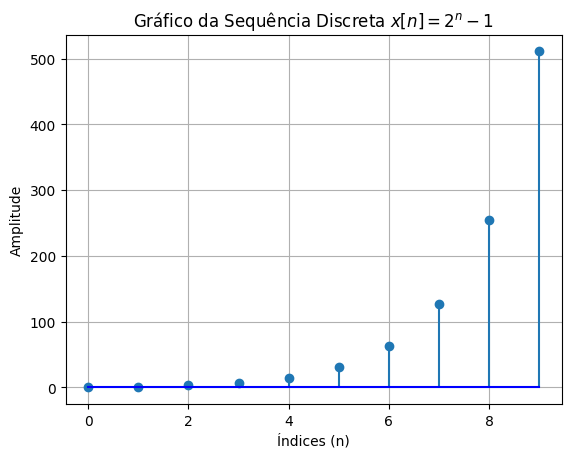

In [99]:
import numpy as np
import matplotlib.pyplot as plt

def gerar_sequencia(n_max=10):
    """
    Gera a sequência discreta x[n] = 2^n - 1.

    Parameters:
    - n_max: Número máximo de pontos para a sequência discreta.

    Returns:
    - x: Sequência discreta resultante.
    """
    n = np.arange(0, n_max)
    x = 2 ** n - 1
    return x

# Gerando a sequência discreta
x = gerar_sequencia(n_max=10)
print("Sequência discreta (x[n]):", x)

# Plotando o gráfico
plt.stem(range(len(x)), x, basefmt='b-', use_line_collection=True)
plt.title('Gráfico da Sequência Discreta $x[n] = 2^n - 1$')
plt.xlabel('Índices (n)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()
